In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
salary = pd.read_csv("/Users/helsh/Downloads/salary/Salary_dataset.csv")
salary.head()

,Index,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [28]:
salary.drop("Index", axis=1)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [29]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


<Axes: xlabel='YearsExperience', ylabel='Salary'>

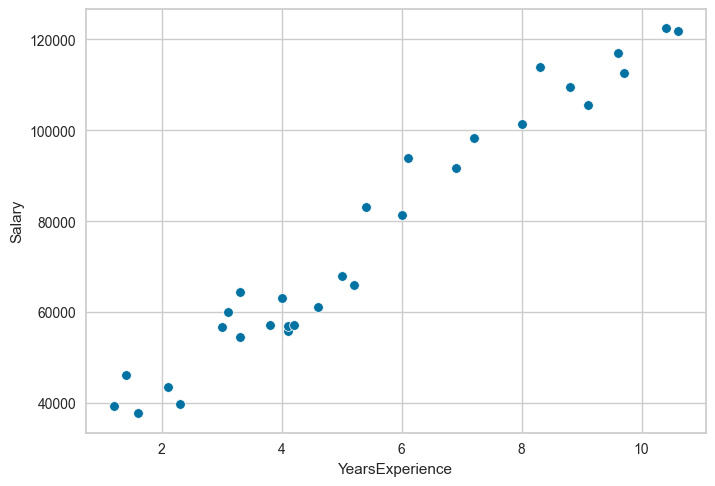

In [30]:
sns.scatterplot(salary, x='YearsExperience', y='Salary')

In [35]:
X = salary.YearsExperience.values
y = salary.Salary.values
X = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

lm = LinearRegression().fit(X_train, y_train)
lm_pred = lm.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, lm_pred)))
print("R2:", r2_score(y_test, lm_pred))

RMSE: 7196.720730498612
R2: 0.9286741096211564


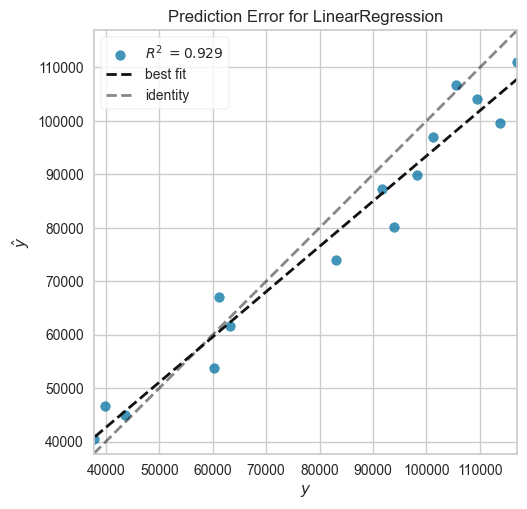

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [36]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(lm).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

<Axes: >

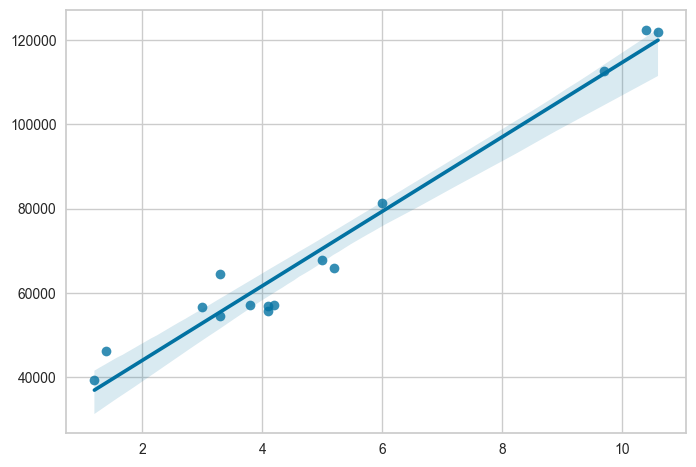

In [52]:
sns.regplot(x=X_train, y=y_train)

<Axes: >

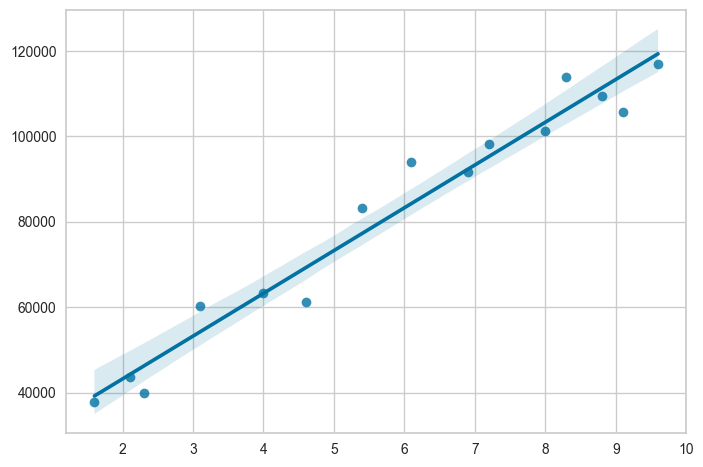

In [53]:
sns.regplot(x=X_test, y=y_test)